In [623]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [624]:
#define parameters
sigma = 1
mu = 7

In [625]:
#Creating Functions.
def gaussPDF(x):
    fx = 1/(sigma*(math.sqrt(2*math.pi))) * math.exp(-0.5*((x-mu)/sigma)**2)
    return fx

def gaussCDF(x):
    fx = 0.5*math.erf((x-mu)/(sigma*(math.sqrt(2))))
    return fx

def gaussxCDF(x):
    fx = 0.5*mu*math.erf((x-mu)/(sigma*(math.sqrt(2)))) - \
         sigma*math.exp(-(x-mu)**2/(2*sigma**2))/math.sqrt(sigma*2)
    return fx

def evap(w):
    fx = gaussxCDF(w)  - gaussxCDF(0) + w*(gaussCDF(mu + 5*sigma)-gaussCDF(w))
    return fx

In [626]:
x = np.linspace(0,10,100)

In [627]:
y = [gaussPDF(i) for i in x]

Text(0, 0.5, 'Probability Density')

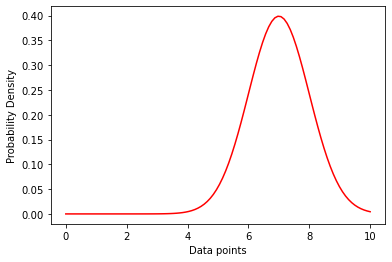

In [628]:
#Plotting the Results
plt.plot(x,y , color = 'red')
plt.xlabel('Data points')
plt.ylabel('Probability Density')

In [629]:
yc = [gaussCDF(i) - gaussCDF(0) for i in x]

Text(0, 0.5, 'Probability')

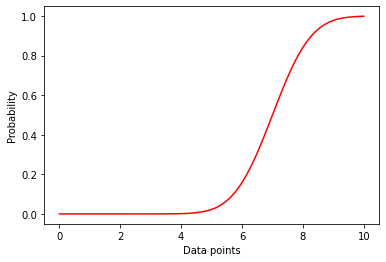

In [630]:
plt.plot(x,yc , color = 'red')
plt.xlabel('Data points')
plt.ylabel('Probability')

In [631]:
yxc = [gaussxCDF(i)  - gaussxCDF(0) for i in x]

Text(0, 0.5, 'new average')

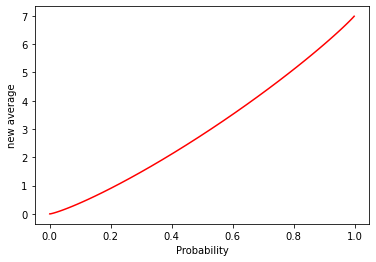

In [632]:
plt.plot(yc, yxc, color = 'red')
plt.xlabel('Probability')
plt.ylabel('new average')

In [633]:
w = [ evap(i) for i in x]

Text(0, 0.5, 'evaped water')

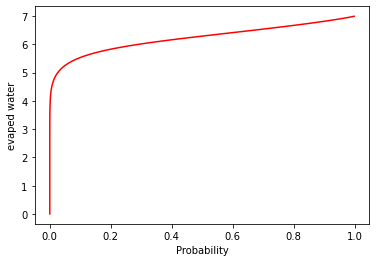

In [634]:
plt.plot(yc, w, color = 'red')
plt.xlabel('Probability')
plt.ylabel('evaped water')

Text(0, 0.5, 'evaped water')

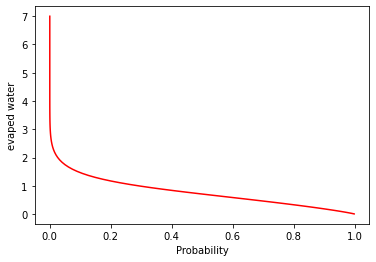

In [635]:
w_ = [7-i for i in w]
plt.plot(yc, w_, color = 'red')
plt.xlabel('Probability')
plt.ylabel('evaped water')

In [636]:
import pandas as pd

In [637]:
braL = [ "(" for i in w ]
braR = [ ")" for i in w ]

In [638]:
w = [i/100 for i in w]

In [639]:
DataAll=[braL, w, yc, braR]

In [640]:
DataAll = np.transpose(DataAll)

In [641]:
data = pd.DataFrame(DataAll)

In [642]:
data.loc[-1] = ['(', None, None, None]  # adding a row
data.index = data.index + 1  # shifting index
data = data.sort_index()  # sorting by index
data.loc[len(data)] = [None, None, None, ')']  # adding a row

In [643]:
data 

,0,1,2,3
0,(,None,None,None
1,(,0.0,0.0,)
2,(,0.0010101007204802684,1.3388734565467075e-12,)
3,(,0.002020201440888408,4.0250025534760425e-12,)
4,(,0.003030302161156819,9.359457653346226e-12,)
...,...,...,...,...
97,(,0.06990810775608154,0.9965013181157727,)
98,(,0.06993081934109265,0.9974288335560034,)
99,(,0.06994842057858947,0.998128165225326,)
100,(,0.06996191580802034,0.9986501019670901,)


In [644]:
data.to_csv("moistureGaussianConv.csv", index=False, header=False, sep=' ')